# Exploring the Rosetta Stone of Human Capital

In this assignment you will work on the working paper [A Rosetta Stone of Human Capital](https://www.cgdev.org/publication/rosetta-stone-human-capital), by Dev Patel and Justin Sandefur. Before you proceed, make sure to download the paper and read it. See also the related article at [The Economist](https://www.economist.com/graphic-detail/2020/10/03/its-better-to-be-a-poor-pupil-in-a-rich-country-than-the-reverse).

As you may know, there are different tests that measure reading and writing skills at school among countries in the world. The problem is that not all countries use the same tests. The basic contribution of the authors was to come up with a way to facilitate conversion between test scores in different countries. In this way they have created what they call a "Rosetta Stone of Human Capital", because it allows us to compare human capital across the different countries.

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr


## Questions

The results of the study are available at <https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx>. You will read the file and put the `Country Scores` sheet in a `DataFrame` that we will call here `country_scores`. You will also download the complete replication materials from [here](https://drive.google.com/drive/folders/1p4PCDOBPXkhkP9nIgLSDXatLvPqNwdTh).

In addition, you will need the following files:

* [US 2000 Census Data](usa_00001.csv.gz). Permission to use the data has been graciously granted by IPUMS USA, and the original publication is: Steven Ruggles, Sarah Flood, Ronald Goeken, Josiah Grover, Erin Meyer, Jose Pacas and Matthew Sobek. IPUMS USA: Version 10.0 [dataset]. Minneapolis, MN: IPUMS, 2020. https://doi.org/10.18128/D010.V10.0.

* [BACI (Base Pour L’ Analyse du Commerce International) Country Trade Data](BACI_HS17_Y2018_V202001.csv.gz). The original publication is: BACI: International Trade Database at the Product-Level. The 1994-2007 Version CEPII Working Paper, N°2010-23, Octobre 2010, Guillaume Gaulier, Soledad Zignago.

* [Country Codes file](country_codes_V202001.csv), also provided by BACI.

### Q1: Income and Test Results

You will study the relationship between income and the TIMSS and PIRLS score, as in Section 4.1 and Figure 5 of the original paper.

Apart from `country_scores`, you will need the following file:
  
  * `WDI_data.csv`, which contains income data per country as given by the World Bank.
  
  Then you should be able to investigate the relationship between logged income and TIMMS, and logged income and PIRLS. Give the summary table of your model. Plot the two relationships, creating plots like the ones shown below.

We will start by reading the required data.  <br>
'Country scores' is a sheet within the excel file 'patel-sandefur-human-capital-final-results' <br>
We assume that we have the file stored in the same folder as the pandas

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

country_scores = pd.read_excel('patel-sandefur-human-capital-final-results.xlsx', 'Country Scores')

In [ ]:
country_scores.head(5)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000


In [ ]:
country_scores[country_scores['Country']=='Yugoslavia']

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
64,Yugoslavia,SRB,90.0,NaN,520.0,NaN


We will also need the csv file 'WDI_data'. <BR>
WE ALSO ASSUME THE FILE IS IN THE SAME FOLDER AS THE NOTEBOOK

In [ ]:
wdi_data= pd.read_csv('WDI_data.csv')

In [ ]:
wdi_data.head(5)

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266


We will now create a pivot table, so that we have the values stored in different columns for each country, and drop the ones we don't need

In [ ]:
wdi_data_pvt = pd.pivot_table(wdi_data, index=['Country Name','Country Code'], columns='Series Name', values ='2015 [YR2015]', aggfunc = sum)
wdi_data_pvt = wdi_data_pvt.reset_index()
wdi_data_pvt = wdi_data_pvt.drop(['School enrollment, primary (% gross)','School enrollment, primary (% net)'], axis = 1)
wdi_data_pvt.head(5)

Series Name,Country Name,Country Code,"GDP per capita, PPP (constant 2011 international $)"
0,Afghanistan,AFG,1809.01648820483
1,Albania,ALB,10971.2925173789
2,Algeria,DZA,13724.723852895
3,American Samoa,ASM,..
4,Andorra,AND,..


Let's now see if there are any country names from our initial df, not included matching any in the income data df

In [ ]:
(country_scores['Country'].unique()[np.isin(country_scores['Country'].unique(), wdi_data_pvt['Country Name'].unique(), invert=True)])

array(['U.A.E.', 'Congo', 'Hong Kong', 'Iran', 'South Korea', 'Russia',
       'Yugoslavia', 'Yemen'], dtype=object)

Now, let's print the country list of the latter df, so as to check if the above countries are listed in a different way

In [ ]:
wdi_data_pvt['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

U.A.E. is registered as 'United Arab Emirates' <br>
Congo has two different registrations. However, the DRC is much bigger than the Republic of Congo, so we will be using 'Congo, Dem. Rep.' as the match
<br>
Hong Kong is registered as 'Hong Kong SAR, China'
<br>
Iran is registered as 'Iran, Islamic Rep.'
<br>
South Korea is registered as 'Korea, Rep.'
<br>
Russia is registered as 'Russian Federation'
<br>
Yemen is registered as 'Yemen, Rep.'
<br>
UPDATE: <br>
Based on the existing data, the mapped value of Congo was not Congo, Dem. Rep., but 'Congo, Rep.'


Yugoslavia is not registered, and does not exist as a country anymore. <br>
However, we will move foward in a next step to investigate

We will try to find if the code allocated to Yugoslavia in ou country_scores df, exists in the GDP data as well

In [ ]:
yugocode = country_scores['Country Code'][country_scores['Country']=='Yugoslavia']

In [ ]:
wdi_data_pvt[wdi_data_pvt['Country Code']==yugocode.values[0]]

Series Name,Country Name,Country Code,"GDP per capita, PPP (constant 2011 international $)"
206,Serbia,SRB,13277.8001173574


In [ ]:
country_scores['Country'] = country_scores['Country'].replace({'U.A.E.': 'United Arab Emirates', 'Congo': 'Congo, Rep.',
                                                               'Hong Kong': 'Hong Kong SAR, China', 'Iran': 'Iran, Islamic Rep.',
                                                               'South Korea': 'Korea, Rep.', 'Russia': 'Russian Federation',
                                                               'Yemen': 'Yemen, Rep.', 'Yugoslavia': 'Serbia'})

In [ ]:
print(country_scores['Country'].unique()[np.isin(country_scores['Country'].unique(), wdi_data_pvt['Country Name'].unique(), invert=True)])

[]


Let's now create a join table including the scores and the data fromt he two above tables

In [ ]:
q1aggr = pd.merge(country_scores, wdi_data_pvt, left_on='Country',right_on='Country Name', how='inner')
#q1aggr = pd.merge(country_scores, wdi_data_pvt, on='Country Code', how='left')
q1aggr.head(10)

,Country,Country Code_x,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",Country Name,Country Code_y,"GDP per capita, PPP (constant 2011 international $)"
0,United Arab Emirates,ARE,64.000000,63.982311,437.000000,440.000000,United Arab Emirates,ARE,65975.3755468552
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,Argentina,ARG,19101.2973920688
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,Armenia,ARM,8195.93364956571
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,Australia,AUS,43719.5021648696
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,Austria,AUT,44353.8752139122
5,Azerbaijan,AZE,72.284508,81.859566,465.000000,467.000000,Azerbaijan,AZE,16698.8636532538
6,Burundi,BDI,91.000000,43.000000,476.978455,392.374207,Burundi,BDI,748.41527127932
7,Benin,BEN,35.000000,35.000000,390.949188,394.196686,Benin,BEN,1987.16714645212
8,Burkina Faso,BFA,59.000000,45.000000,422.527435,395.008057,Burkina Faso,BFA,1596.3345381736
9,Bulgaria,BGR,NaN,93.048439,NaN,541.000000,Bulgaria,BGR,17000.1672471067


In [ ]:
q1aggr['log_GDP'] = np.log(pd.to_numeric(q1aggr['GDP per capita, PPP (constant 2011 international $)']))
q1aggr = q1aggr.drop(['Country Name','Country Code_y'], axis = 1)
q1aggr = q1aggr.rename(columns={'Country Code_x': 'Country Code', 'Median Math Score (TIMSS Scale, 4th Grade)': 'TIMSS', 'Median Reading Score (PIRLS Scale, 4th Grade)' : 'PIRLS'})
q1aggr.head(5)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,"GDP per capita, PPP (constant 2011 international $)",log_GDP
0,United Arab Emirates,ARE,64.000000,63.982311,437.000000,440.000000,65975.3755468552,11.097037
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19101.2973920688,9.857512
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8195.93364956571,9.011393
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43719.5021648696,10.685550
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44353.8752139122,10.699955


In [ ]:
q1mod1 = smf.ols("TIMSS ~ log_GDP", data=q1aggr)
q1model1 = q1mod1.fit()
q1model1.params

Intercept    46.117041
log_GDP      41.745974
dtype: float64

In [ ]:
q1model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           5.07e-08
Time:                        15:27:42   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
log_GDP       41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
q1mod2 = smf.ols("PIRLS ~ log_GDP", data=q1aggr)
q1model2 = q1mod2.fit()
q1model2.params

Intercept    42.619127
log_GDP      43.912415
dtype: float64

In [ ]:
q1model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.48e-10
Time:                        15:27:43   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
log_GDP       43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
q1model1.resid

0     -72.373659
1     -50.975909
2      31.693559
3      27.804280
4      18.202895
         ...    
72    -71.630225
73     10.918500
74    -34.281533
75     43.745211
76   -132.030663
Length: 71, dtype: float64

C:\Users\giann\anaconda3\lib\site-packages\plotnine\layer.py:464: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


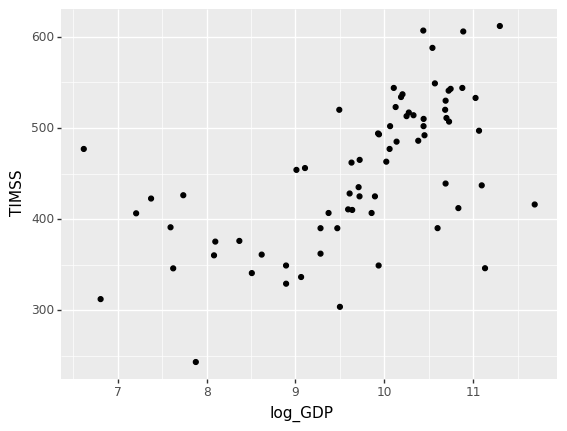

<ggplot: (88658992836)>

In [ ]:
ggplot(data=q1aggr) +\
    geom_point(mapping=aes(x='log_GDP', y='TIMSS'))

![GDP (PPP) and TIMSS](gdp_timss.svg)

C:\Users\giann\anaconda3\lib\site-packages\plotnine\layer.py:464: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


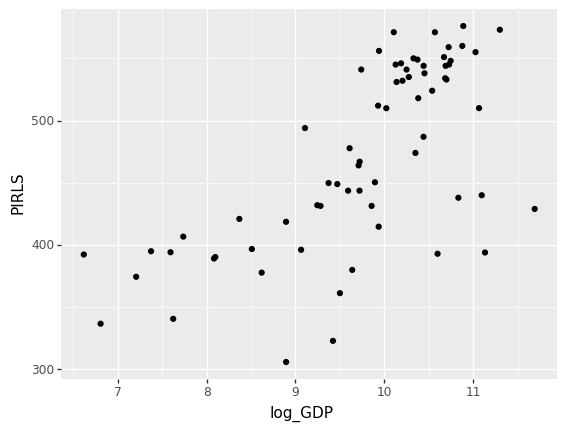

<ggplot: (88659145719)>

In [ ]:
ggplot(data=q1aggr) +\
    geom_point(mapping=aes(x='log_GDP', y='PIRLS'))

![GDP (PPP) and PIRLS](gdp_pirls.svg)

We move forward to add the residuals as information on our dataframe (will be needed for q2)

In [ ]:
q1aggr['TIMSS_res'] = q1model1.resid
q1aggr['PIRLS_res'] = q1model2.resid
q1aggr.head(5)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,"GDP per capita, PPP (constant 2011 international $)",log_GDP,TIMSS_res,PIRLS_res
0,United Arab Emirates,ARE,64.000000,63.982311,437.000000,440.000000,65975.3755468552,11.097037,-72.373659,-89.916813
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19101.2973920688,9.857512,-50.975909,-44.042720
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8195.93364956571,9.011393,31.693559,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43719.5021648696,10.685550,27.804280,22.152588
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44353.8752139122,10.699955,18.202895,20.519995


### Q2: Years of Schooling and Test Scores

You will explore how much years of schooling impact test scores, taking account of the per capita income, as in Section 4.1 and Figure 6 of the original paper. To do that, you will need to take the residuals of the models you created in Q1; the residuals contain what cannot be explained by income, so we can use them to see how much of what cannot be explained by income can be explained by years of schooling.

Apart from `country_scores`, you will need the following file:

* `BL2013_MF1599_v2.2.dta`, which contains average years of schooling data from Barro, Robert J. and Jong-Wha Lee,  A New Data Set of Educational Attainment in the World, 1950-2010, Journal of Development Economics, 2013, 104, 194-198. You will use the values reported for 2010.

You already have the residuals for TIMSS and PIRLS; you have to fit a model for the the logged per capita GDP in 2015 (independent variable) and the years of schooling (dependent variable). Show the results of your model and get the residuals. These residuals describe the years of schooling that cannot be explained by income. Then, run a regression between the TIMMS residuals and the schooling residuals, and another regression between the PIRLS residuals and the schooling residuals. Show the model results and figures like the ones below.

In [ ]:
schooling_years = pd.read_stata('BL2013_MF1599_v2.2.dta')
schooling_years.head(5)

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa


We only need data regarding 2010, so we filter accordingly

In [ ]:
schooling_years = schooling_years[schooling_years['year'] == 2010]
len(schooling_years)
schooling_years

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.0,Algeria,2010.0,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010.0,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010.0,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010.0,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010.0,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,326.0,Republic of Moldova,2010.0,MF,15.0,999.0,0.976749,6.086153,3.653862,78.326561,54.266289,14.610540,8.756674,10.404020,3.912284,6.024392,0.467344,2982.0,ROM,Europe and Central Asia
1858,329.0,Serbia,2010.0,MF,15.0,999.0,2.960607,8.992959,7.690698,73.507530,48.711517,14.538917,8.968564,10.845333,6.029522,4.345661,0.470150,8667.0,SER,Europe and Central Asia
1871,331.0,Slovenia,2010.0,MF,15.0,999.0,0.657998,3.077496,2.661207,76.408531,56.119919,19.855972,13.252562,11.890487,6.387317,4.841000,0.662170,1700.0,SVN,Europe and Central Asia
1884,342.0,"China, Macao Special Administrative Region",2010.0,MF,15.0,999.0,3.457963,21.363201,16.163477,58.113544,32.111195,17.065292,10.434196,8.543072,4.873250,3.119832,0.549990,416.0,MAC,East Asia and the Pacific


Let's now do the same countries inclusion check, for the two DFs under question

In [ ]:
print(country_scores['Country'].unique()[np.isin(country_scores['Country'].unique(), schooling_years['country'].unique(), invert=True)])

['Azerbaijan' 'Burkina Faso' "Cote d'Ivoire" 'Congo, Rep.'
 'Dominican Republic' 'Georgia' 'Hong Kong SAR, China'
 'Iran, Islamic Rep.' 'Korea, Rep.' 'Oman' 'Slovak Republic' 'Chad'
 'United States' 'Yemen, Rep.']


We now see we also have discrepances here. <br>This time, we will solely rely on our observation and logic, since we don't have the Country code crosscheck method

In [ ]:
np.sort(schooling_years['country'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belgium', 'Belize', 'Benin', 'Bolivia', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia', 'Congo',
       'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Ke

In [ ]:
schooling_years['country'] = schooling_years['country'].replace({'Cote dIvoire': "Cote d'Ivoire", 'Congo': 'Congo, Rep.',
                                                               'Dominican Rep.': 'Dominican Republic',
                                                               'China, Hong Kong Special Administrative Region': 'Hong Kong SAR, China',
                                                               'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
                                                               'Republic of Korea': 'Korea, Rep.',
                                                               'Slovakia': 'Slovak Republic', 'USA': 'United States', 'Yemen': 'Yemen, Rep.'})

In [ ]:
print(country_scores['Country'].unique()[np.isin(country_scores['Country'].unique(), schooling_years['country'].unique(), invert=True)])

['Azerbaijan' 'Burkina Faso' 'Georgia' 'Oman' 'Chad']


The above countries do not exist in any form in the schooling_years DF (that we can tell of), so we aknowledge we will miss these rows

We proceed to create the aggregate of the schooling years. We will do that, by merging it with the aggregate of the 1st question. <br>And why is that? <br>So as to ensure, the only countries we will be mergin on, are the ones also included in the country_scores, but by having the information of the income data at hand, to create our regression model

In [ ]:
q2aggr = pd.merge(q1aggr, schooling_years, left_on='Country', right_on='country', how='inner')

In [ ]:
q2aggr['log_GDP'] = np.log(pd.to_numeric(q2aggr['GDP per capita, PPP (constant 2011 international $)']))
#2aggr = q2aggr.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)': 'TIMSS', 'Median Reading Score (PIRLS Scale, 4th Grade)' : 'PIRLS'})
q2aggr.head(5)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,"GDP per capita, PPP (constant 2011 international $)",log_GDP,TIMSS_res,PIRLS_res,...,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,United Arab Emirates,ARE,64.000000,63.982311,437.000000,440.000000,65975.3755468552,11.097037,-72.373659,-89.916813,...,35.680801,14.387889,8.537878,9.066772,5.076396,3.531861,0.458515,3998.0,ARE,Middle East and North Africa
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19101.2973920688,9.857512,-50.975909,-44.042720,...,31.072559,11.178634,2.865633,9.510379,6.565071,2.664423,0.280885,30538.0,ARG,Latin America and the Caribbean
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8195.93364956571,9.011393,31.693559,NaN,...,57.121227,25.444443,15.033582,10.726531,4.622946,5.294024,0.809561,2452.0,ARM,Europe and Central Asia
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43719.5021648696,10.685550,27.804280,22.152588,...,38.486927,30.979252,18.516401,11.541207,5.966004,4.585290,0.989913,17323.0,AUS,Advanced Economies
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44353.8752139122,10.699955,18.202895,20.519995,...,40.812618,15.362918,9.365829,9.603404,3.848745,5.260084,0.494575,7090.0,AUT,Advanced Economies


In [ ]:
q2mod1 = smf.ols("yr_sch ~ log_GDP", data=q2aggr)
q2model1 =q2mod1.fit()
q2model1.params

Intercept   -10.011303
log_GDP       1.950497
dtype: float64

In [ ]:
q2model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yr_sch   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           6.33e-16
Time:                        15:29:54   Log-Likelihood:                -141.32
No. Observations:                  73   AIC:                             286.6
Df Residuals:                      71   BIC:                             291.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0113      1.848     -5.417      0.000     -13.697      -6.326
log_GDP        1.9505      0.187     10.405      0.000       1.577       2.324
==============================================================================
Omnibus:                        8.088   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                7.492
Skew:                          -0.712   Prob(JB):                       0.0236
Kurtosis:                       3.659   Cond. No.                         92.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now move to add to the new aggregation, the residuals of schooling years, so as to plot them with the residuals of Q1

In [ ]:
q2aggr['schooling_res'] = q2model1.resid

In [ ]:
q2aggr.head(2)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS,PIRLS,"GDP per capita, PPP (constant 2011 international $)",log_GDP,TIMSS_res,PIRLS_res,...,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code,schooling_res
0,United Arab Emirates,ARE,64.0,63.982311,437.000000,440.000000,65975.3755468552,11.097037,-72.373659,-89.916813,...,14.387889,8.537878,9.066772,5.076396,3.531861,0.458515,3998.0,ARE,Middle East and North Africa,-2.566667
1,Argentina,ARG,51.0,66.000000,406.652557,431.443542,19101.2973920688,9.857512,-50.975909,-44.042720,...,11.178634,2.865633,9.510379,6.565071,2.664423,0.280885,30538.0,ARG,Latin America and the Caribbean,0.294631


C:\Users\giann\anaconda3\lib\site-packages\plotnine\layer.py:464: PlotnineWarning: geom_point : Removed 7 rows containing missing values.


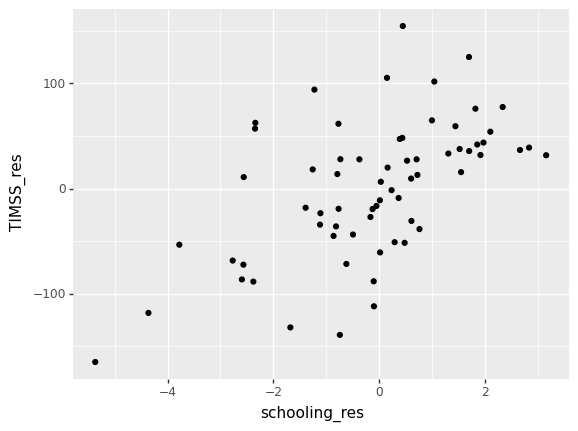

<ggplot: (88658996860)>

In [ ]:
ggplot(data=q2aggr) +\
    geom_point(mapping=aes(x='schooling_res', y='TIMSS_res'))

![Schooling and TIMSS](schooling_timms.svg)

C:\Users\giann\anaconda3\lib\site-packages\plotnine\layer.py:464: PlotnineWarning: geom_point : Removed 10 rows containing missing values.


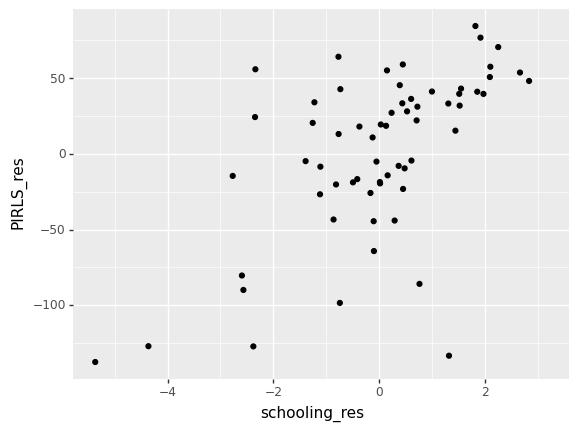

<ggplot: (88659125023)>

In [ ]:
ggplot(data=q2aggr) +\
    geom_point(mapping=aes(x='schooling_res', y='PIRLS_res', label = 'Country'))

In [ ]:
len(q2aggr)

73

![Schooling and PIRLS](schooling_pirls.svg)

### Q3: Compare New and Previous Estimates

To see if the results of the authors make sense, we can compare their scales with other estimates of learning outcomes, as in Section 4.1 and Figure 7 of the original paper.

Apart from `country_scores`, you will need the following file:

* `HLO Panel Data (mean, thresh) - Jan 2018.dta`, which contains learning outcome estimates from the World Bank, as reported in Altinok, Nadir, Noam Angrist, and Harry Anthony Patrinos, Global Data Set on Education Quality (1965-2015), World Bank Policy Research Working Paper, 2018.

The percentage of subjects above the 400 mark is given by the `low_threshold` column in the above file, and this can be used to check the new estimates of the authors. To compare the new and the previous estimates, you will run a Spearman test between the new estimates for TIMSS and the previous estimates, and similarly for PIRLS. Use the latest year for which estimates are available for each country. Report your findings. Then, create two plots like the following.

In [ ]:
wbe = pd.read_stata('HLO Panel Data (mean, thresh) - Jan 2018.dta')
wbe = wbe.dropna(subset=['low_threshold'])

In [ ]:
wbe.head(5)

,country,idcntry,cntabb,year,HLO,low_threshold
9,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
18,Albania,8,ALB,2000,400.649994,57.750000
19,Albania,8,ALB,2005,399.320007,60.150002
20,Albania,8,ALB,2010,402.750000,61.320000


In [ ]:
wbe_pvt = pd.pivot_table(wbe, index=['country','idcntry', 'cntabb'], columns='year', values ='low_threshold', aggfunc = sum)
wbe_pvt = wbe_pvt.reset_index()
#wdi_data_pvt = wdi_data_pvt.drop(['School enrollment, primary (% gross)','School enrollment, primary (% net)'], axis = 1)
wbe_pvt.head(5)

year,country,idcntry,cntabb,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
0,"Abu Dhabi, UAE",7842,ADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.830002,73.750000
1,Albania,8,ALB,NaN,NaN,NaN,NaN,NaN,NaN,57.750000,60.150002,61.320000,70.650002
2,Algeria,12,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.110001,NaN,51.310001
3,Argentina,32,ARG,NaN,NaN,NaN,NaN,NaN,67.989998,60.360001,64.889999,65.949997,70.860001
4,"Argentina, Buenos Aires",974,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.750000


In order to assign the most recent data available to each country, we will create a 'recent' column. <br>
We will initilly assign the values of 2015, and going back each time by 5 years, we will be assigning the next most recent data to all the rows where the 'recent' column is null, until there's no null left. <br>
Obviously, we could've fit the procedure in a for loop, but it's better for us to explore and get an idea of how recent the available data are

In [ ]:
wbe_pvt['recent'] = wbe_pvt[2015]
wbe_pvt['recent'].isna().sum()

59

In [ ]:
wbe_pvt ['recent'] = np.where(wbe_pvt['recent'].isnull(),wbe_pvt[2010],wbe_pvt['recent'])
wbe_pvt['recent'].isna().sum()

39

In [ ]:
wbe_pvt ['recent'] = np.where(wbe_pvt['recent'].isnull(),wbe_pvt[2005],wbe_pvt['recent'])
wbe_pvt['recent'].isna().sum()

11

In [ ]:
wbe_pvt ['recent'] = np.where(wbe_pvt['recent'].isnull(),wbe_pvt[2000],wbe_pvt['recent'])
wbe_pvt['recent'].isna().sum()

4

In [ ]:
wbe_pvt ['recent'] = np.where(wbe_pvt['recent'].isnull(),wbe_pvt[1995],wbe_pvt['recent'])
wbe_pvt['recent'].isna().sum()

1

In [ ]:
wbe_pvt ['recent'] = np.where(wbe_pvt['recent'].isnull(),wbe_pvt[1990],wbe_pvt['recent'])
wbe_pvt['recent'].isna().sum()

0

Before we do our standard country names check, we can do the check for the country codes (no specific reason to merge on names)

In [ ]:
countid3 = (country_scores['Country Code'].unique()[np.isin(country_scores['Country Code'].unique(), wbe_pvt['cntabb'].unique(), invert=True)])
print(countid3)

['COG']


In [ ]:
countid3 = countid3[0]

We only found one mismatch. Let's check which country it belongs to in the country_scores DF

In [ ]:
country_scores['Country'][country_scores['Country Code']==countid3[0]]

Series([], Name: Country, dtype: object)

And now let's see if there is any registration of Congo in our world bank DF

In [ ]:
wbe_pvt['country'].unique()

array(['Abu Dhabi, UAE', 'Albania', 'Algeria', 'Argentina',
       'Argentina, Buenos Aires', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Basque Country, Spain', 'Belgium',
       'Belgium Flemish', 'Belgium French', 'Benin',
       'Bolivia Plurinational State of', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroun', 'Canada', 'Canada, Alberta',
       'Canada, British Colombia', 'Canada, Nova Scotia',
       'Canada, Ontario', 'Canada, Quebec', 'Chad', 'Chile', 'China',
       'Chinese Taipei', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Dubai, UAE', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Estonia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Honduras', 'Hong Kong, China', 'Hung

Indeed, it exists as  'Democratic Republic of the Congo'. This time, however, we won't be mapping its name, but its code

In [ ]:
codeforchange = wbe_pvt['cntabb'][wbe_pvt['country']== 'Democratic Republic of the Congo'].values[0]
wbe_pvt['cntabb'] = wbe_pvt['cntabb'].replace({codeforchange : countid3})

Now we can merge the DFs

In [ ]:
q3aggr = pd.merge(country_scores, wbe_pvt[['country', 'cntabb', 'recent']], left_on='Country Code',right_on='cntabb', how='inner')
q3aggr.head(2)

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",country,cntabb,recent
0,United Arab Emirates,ARE,64.0,63.982311,437.000000,440.000000,United Arab Emirates,ARE,80.839996
1,Argentina,ARG,51.0,66.000000,406.652557,431.443542,Argentina,ARG,70.860001


In [ ]:
q3aggrt = q3aggr.drop(['Percent Above Reading Benchmark (400 on PIRLS Scale)','Median Math Score (TIMSS Scale, 4th Grade)',
                      'Median Reading Score (PIRLS Scale, 4th Grade)'],  axis = 1)
q3aggrt = q3aggrt.dropna(subset = ['Percent Above Math Benchmark (400 on TIMSS Scale)'])
q3aggrt['Percent Above Math Benchmark (400 on TIMSS Scale)'] = pd.to_numeric(q3aggr['Percent Above Math Benchmark (400 on TIMSS Scale)'])
q3aggrt['recent'] = pd.to_numeric(q3aggr['recent'])

xt = q3aggrt['recent']
yt = q3aggrt['Percent Above Math Benchmark (400 on TIMSS Scale)']

In [ ]:
q3aggrp = q3aggr.drop(['Percent Above Math Benchmark (400 on TIMSS Scale)','Median Math Score (TIMSS Scale, 4th Grade)',
                      'Median Reading Score (PIRLS Scale, 4th Grade)'],  axis = 1)
q3aggrp = q3aggrp.dropna(subset = ['Percent Above Reading Benchmark (400 on PIRLS Scale)'])
q3aggrp['Percent Above Reading Benchmark (400 on PIRLS Scale)'] = pd.to_numeric(q3aggr['Percent Above Reading Benchmark (400 on PIRLS Scale)'])
q3aggrp['recent'] = pd.to_numeric(q3aggr['recent'])

xp = q3aggrp['recent']
yp = q3aggrp['Percent Above Reading Benchmark (400 on PIRLS Scale)']

In [ ]:
q3aggrt.isna().sum()

Country                                              0
Country Code                                         0
Percent Above Math Benchmark (400 on TIMSS Scale)    0
country                                              0
cntabb                                               0
recent                                               0
dtype: int64

In [ ]:
q3aggrp.isna().sum()

Country                                                 0
Country Code                                            0
Percent Above Reading Benchmark (400 on PIRLS Scale)    0
country                                                 0
cntabb                                                  0
recent                                                  0
dtype: int64

In [ ]:
len(q3aggrt)

66

Let's go an calculate our Spearman test

In [ ]:
print('Spearman', stats.spearmanr(xt, yt))

Spearman SpearmanrResult(correlation=0.8961410492368577, pvalue=1.0886776254998524e-25)


In [ ]:
print('Spearman', stats.spearmanr(xp, yp))

Spearman SpearmanrResult(correlation=0.9063295897762149, pvalue=1.247559985949932e-25)


In [ ]:
q3aggr[q3aggr['cntabb']=='PRT']

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",country,cntabb,recent
56,Portugal,PRT,97.0,97.593697,534.0,546.0,Portugal,PRT,88.25


In [ ]:
q3aggrt[q3aggrt['cntabb']=='PRT']

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),country,cntabb,recent
56,Portugal,PRT,97.0,Portugal,PRT,88.25


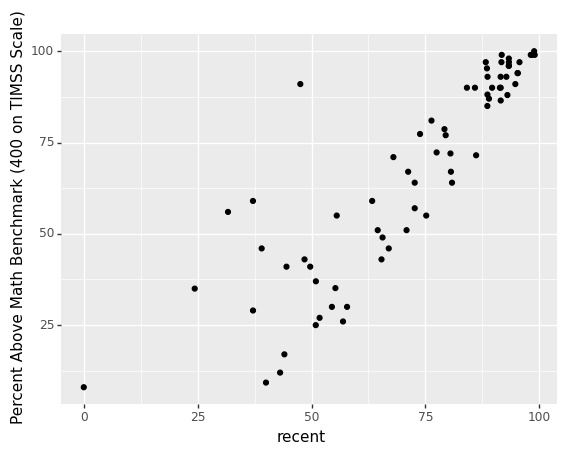

<ggplot: (88660938108)>

In [ ]:
ggplot(data=q3aggrt) +\
    geom_text(mapping=aes(x='recent', y='Percent Above Math Benchmark (400 on TIMSS Scale)'), label=q3aggrt['Country Code'])

![TIMMS and World Bank Indicators](new_timms.svg)

C:\Users\giann\anaconda3\lib\site-packages\plotnine\layer.py:464: PlotnineWarning: geom_text : Removed 8 rows containing missing values.


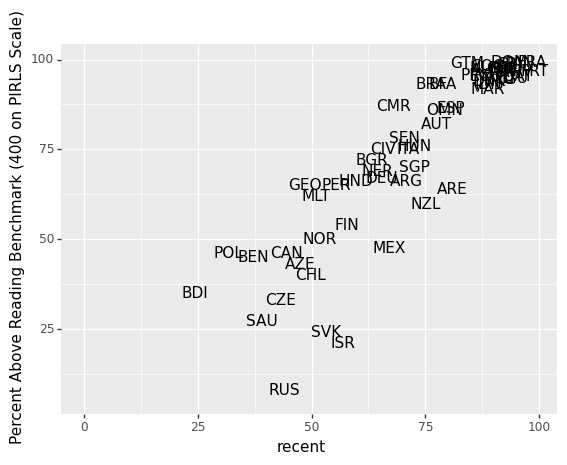

<ggplot: (88659140584)>

In [ ]:
ggplot(data=q3aggrp) +\
    geom_text(mapping=aes(x='recent', y='Percent Above Reading Benchmark (400 on PIRLS Scale)'), label=q3aggrp['Country Code'])

![PIRLS and World Bank Indicators](new_pirls.svg)

### Q4: Skills Intensity

You will study the relationship between the skills of the people in each country and the value of its exports, as described in Section 4.2 of the original paper. You will do this with performing four regressions:

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In the above:

* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

* $\mathrm{college}_i$ is the portion of employees in industry $i$ with at least a college degree

* $\mathrm{highschool}$ is the portion of employees in industry $i$ with at least a high school degree

Report the $R^2$ and the intercept for the interaction terms in each of the models. Note that your values may be different from that of Table 2 of the paper, because the authors perform a lot of data manipulation that you may not do, and they also use a statistical model that is different from the ones we have seen in `statsmodels`. However, the $R^2$ values should be comparable.

Running the regression is easy; the tough part is bringing together all the required data in one place. Apart from `country_scores`, you will need the following files:

* `usa_00001.csv.gz`

* `cw_ind2000_ind1990ddx.dta`

* `BACI_HS17_Y2018_V202001.csv.gz`

* `cw_hs6_sic87dd.dta`

* `cw_sic87_ind1990ddx.dta`

* `country_codes_V202001.csv.gz`

From the data in `usa_00001.csv.gz` you will identify college graduates, using the rule that they have at least 10 years of education. Similarly, you will identify high school graduates, using the rule that they have at least 6 years of education. For every different industry in the census data, you will calculate the weighted average of college graduates and high school graduates, using the `PERWT` attribute, which shows how many persons in the US population are represented by a given person in the data. Create a `DataFrame` that contains the industry, the weighted average for college graduates, and the weighted average for high school graduates. We'll call that the `skills_intensity_industry` `DataFrame`, as it shows, for every industry the intensity of skills of the people working in that particular industry in the 2000 census.

The census data is from 2000 so the data are about the interval from 1990 to 2000. The industry codes for 1990, however, are not the same with the industry codes used in 2000. The `cw_ind2000_ind1990ddx.dta` file maps industry codes of 1990 and 2000, with a weight to account for the differences in the ten years. You will use that file to reweight the weighted averages in `skills_intensity_industry` with the corresponding weight in each mapping.

Then you will take on the `BACI_HS17_Y2018_V202001.csv.gz` file. That one contains records showing the exports of different countries in 2018 for different industry sectors. In particular, the columns of the file are:

* `t`: year
* `i`: exporter (ISO 3-digit country code)
* `j`: importer (ISO 3-digit country code)
* `k`: product category (Harmonized System, HS, 6-digit code)
* `v`: value of the trade flow (in thousands current USD)
* `q`: quantity (in metric tons)

The HS 6-digit code must be mapped to the industry codes we are using in the rest of the data. This can be done in two steps. First, with the `cw_hs6_sic87dd.dta` you can map the HS 6-digit code with Standard Industrial Codes (SIC) SIC87 industry codes. You will need to adjust the value of the trade flow of the BACI file with the `share` column of `cw_hs6_sic87dd.dta`. After you have done that, group the trade flow by exporter and SIC87 industry code, so that you have the total value per exporter and industry. You will then use the `cw_sic87_ind1990ddx.dta` file to map the SIC87 industry codes to the 1990 census industry codes.

There is one last problem. The exporter countries are given with the ISO 3-digit country codes, but we need to three letter country code that is used in the rest of our data. To do the mapping you can use the `country_codes_V202001.csv` file.

After all this, you will have a `DataFrame`, let us call it `exports`, which contains, for each country, the value of its exports, per the 2018 year, per industry. Now you can join the `exports` `DataFrame` with the `skills_intensity_industry` `DataFrame` and the `country_scores` `DataFrame`, so that you get for each country, value of exports per industry and the weighted average of high school graduates and college graduates. This will allow you to study the relationship between the value of exports in the country and the skills possessed by the workforce in the country.

Let's start by reading all our files

In [ ]:
usa = pd.read_csv('usa_00001.csv.gz', compression='gzip',
                   error_bad_lines=False)
usa

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371614,2000,200004,157985,600.0,2000001579854,12,1,3,494.0,1,10,0,0,9920,0
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337
371616,2000,200004,157986,600.0,2000001579864,6,1,2,600.0,6,65,1,10,130,759


In [ ]:
mapper9020 = pd.read_stata('cw_ind2000_ind1990ddx.dta')
mapper9020.head(5)

,ind2000,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907


## Submission Instructions

You will submit a Jupyter notebook that will contain all your code and analysis. Ensure that the notebook will run correctly in a computer that is not your own. That means, among other things, that it does not contain absolute paths. Remember that a notebook is not a collection of code cells thrown together; it should contain as much text as necessary for a person to understand what you are doing.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, by Googling or searching in StackOverflow for general questions pertaining to the use of Python,  libraries, and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your fellow students in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.